<font color=orange size='10'>DATA WRANGLING FINAL PROJECT</font>
***

Presented By: Akanksha Bajpai, Kavya Mannava, Shivanand Reddy Pulakanti, Shivani Bommidi

Dated: Oct 7, 2023



### INTRODUCTION
***

**Problem Statement:**

The study we have conducted revolves around the critical business problem of optimizing revenue generation through a comprehensive examination of customer purchasing behavior by analysing the impact of marketing campaigns.

In particular, we have delved into the <a href="https://bradleyboehmke.github.io/completejourney/index.html" target="_blank">completejourney</a> data encompassing transactions from approximately 2469 households who shopped at grocery stores over the span of a year. The CEO of Foodelicious should have a keen interest in this analysis due to its potential to directly impact the company's financial performance and competitiveness in the market. By understanding product categories that drive revenue, trends in customer spending, and the effectiveness of marketing campaigns, we aim to offer actionable insights that can lead to informed decision-making and revenue growth.


**Problem Analytical Approach:**

To address this multifaceted problem statement, we embarked on a rigorous analytical journey. We leveraged the completejourney data, which provided a wealth of information about household-level transactions. Our methodology encompassed the following steps:


1. **Data Collection and Cleaning**: We imported the data from <a href="https://bradleyboehmke.github.io/completejourney/index.html" target="_blank">completejourney</a> package. We used data tables such as campaigns, campaign_descriptions, demographics, transactions, products,coupons to support our analysis and cleaned the data to ensure its accuracy and reliability.

2. **Exploratory Data Analysis (EDA)**: EDA was performed to gain valuable insights into customer behavior, product categories, and the impact of marketing campaigns. We have divided the problem statement into following sub tasks/questions to support our research analysis.

    *(i) What are the top 10 product categories that exhibited the highest revenue generation following the completion of our marketing campaigns?*
 
    *(ii) How can we describe the monthly revenue trends derived from all households?*
 
    *(iii) Which are the top 5 product categories favored by households in each income bracket subsequent to our marketing campaigns?*
 
    *(iv) Can we identify any disparities between the top 5 product categories before and after our marketing campaigns?*
 
    *(v) Which product categories, despite the implementation of our marketing campaigns, continue to show negligible or no income generation?*
    
3. **Approach**: We segmented households by income levels to understand variations in product preferences.We compared product category preferences before and after marketing campaigns to assess their impact. We identified product categories that were not generating significant income even after campaigns, highlighting areas for improvement.

4. **Proposed Solution and Benefits**: Our analysis provides a multifaceted solution that will greatly benefit the Foodelicious CEO by offering data-driven insights into the top revenue-generating product categories, enabling more targeted marketing strategies. By examining monthly trends in revenue and spending, we empower decision-makers to anticipate and respond to market fluctuations. Segmenting customers by income levels allows for tailored marketing efforts, ensuring a more personalized shopping experience. Our analysis evaluates the effectiveness of marketing campaigns, enabling the CEO to make informed decisions about future campaign strategies. Identification of underperforming product categories presents an opportunity to optimize offerings and boost overall revenue.

In conclusion, our analysis equips the CEO with actionable insights and strategies that can enhance revenue generation, improve customer engagement, and strengthen Foodelicious's competitive position in the grocery store market.

### PACKAGES REQUIRED:

***

*pandas -> used for creation and transformation of dataframes*

*numpy -> used for numerical calculation*

*matplotlib.pyplot -> used for plotting and formatting charts*

*seaborn -> used for plotting and formatting charts*

*warnings -> used to manage warning messages*

*completejourney_py -> used to fetch completejourney data for analysis*

In [1]:
from completejourney_py import get_data 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #to suppress these warning messages

### DATA COLLECTION AND CLEANING:
***

In [2]:
#getting each table data and storing into a variable

transactions = get_data()["transactions"] 
demographics = get_data()["demographics"]
campaigns = get_data()["campaigns"]
campaign_descriptions = get_data()["campaign_descriptions"]
products = get_data()["products"]
coupons = get_data()["coupons"] 

#### *Checking the first 5 rows of each data set to check the headers and the type of data present in each column*

In [3]:
transactions.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27


In [4]:
coupons.tail()

,coupon_upc,product_id,campaign_id
116199,59986600074,10456329,18
116200,59986600074,10457608,18
116201,59986600074,12385921,18
116202,59986600074,6961675,18
116203,59986600074,877774,18


In [5]:
demographics.head()

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0
2,1003,35-44,25-34K,None,Unmarried,1,1 Adult No Kids,0
3,1004,25-34,15-24K,None,Unmarried,1,1 Adult No Kids,0
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2


In [6]:
campaigns.head()

,campaign_id,household_id
0,1,105
1,1,1238
2,1,1258
3,1,1483
4,1,2200


In [7]:
campaign_descriptions.head()

,campaign_id,campaign_type,start_date,end_date
0,1,Type B,2017-03-03,2017-04-09
1,2,Type B,2017-03-08,2017-04-09
2,3,Type C,2017-03-13,2017-05-08
3,4,Type B,2017-03-29,2017-04-30
4,5,Type B,2017-04-03,2017-05-07


In [8]:
products.head()

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISCELLANEOUS,National,None,None,None
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,None
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


#### Checking for NULL values in each data set and filling missing values if present

In [9]:
transactions.isnull().sum()

household_id             0
store_id                 0
basket_id                0
product_id               0
quantity                 0
sales_value              0
retail_disc              0
coupon_disc              0
coupon_match_disc        0
week                     0
transaction_timestamp    0
dtype: int64

In [10]:
products.isnull().sum()

product_id              0
manufacturer_id         0
department              0
brand                   0
product_category      540
product_type          528
package_size        30586
dtype: int64

In [12]:
#updated the product_category null values with the mode of the department and loaded the file.
products_updated=pd.read_csv("/Users/kavyamannava/Library/CloudStorage/OneDrive-UniversityofCincinnati/Data Wrangling Final Project Data/dw_products.csv")

 *As we are concentrating on 'product_id','product_category' values only, we updated products data with only product_category missing values*

In [13]:
products_updated.isnull().sum()

product_id              0
manufacturer_id         0
department              0
brand                   0
product_category        0
product_type          528
package_size        30586
dtype: int64

In [14]:
demographics.isnull().sum()

household_id        0
age                 0
income              0
home_ownership    233
marital_status    137
household_size      0
household_comp      0
kids_count          0
dtype: int64

In [15]:
campaigns.isnull().sum()

campaign_id     0
household_id    0
dtype: int64

In [16]:
campaign_descriptions.isnull().sum()

campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

In [17]:
coupons.isnull().sum()

coupon_upc     0
product_id     0
campaign_id    0
dtype: int64

### EXPLORATORY DATA ANALYSIS:
***
#### *Merging the necessary datasets to create new dataframes and dropping null values if necessary*

In [18]:
# dropped duplicates from coupons dataframe to fetch unique records of product_id and campaign_id
campaign_unique=coupons.drop_duplicates(subset=['product_id','campaign_id'])

# left join of campaigns and campaign_unique to get records of campaign_id, household_id and product_id
campaign_coupons = pd.merge(campaigns,campaign_unique,on='campaign_id', how='left')

# dropped duplicates from campaign_coupons to get unique records of campaign_id, household_id and product_id
campaign_coupons.drop_duplicates(['campaign_id','household_id','coupon_upc','product_id'])

# merged campaign_coupons and transactions on household_id and product_id to get information of transactions along with respective campaigns conducted.
transaction_campaigns = pd.merge(transactions,campaign_coupons,on=['household_id','product_id'], how='inner')

# merged transaction_campaigns and campaign decsriptions on campaign_id to get the start date of each transaction.
transactions_campaigns_desc = pd.merge(transaction_campaigns,campaign_descriptions,on='campaign_id', how='left')

# filtered the transactiosn which are generated after start date of the campaign.
transactions_after_startdate=transactions_campaigns_desc[pd.to_datetime(transactions_campaigns_desc['transaction_timestamp'])>pd.to_datetime(transactions_campaigns_desc['start_date'])]

# calculated total spend of the respective household by multiplying quantity and sales_value
transactions_after_startdate['total_spend']=transactions_after_startdate['quantity']*transactions_after_startdate['sales_value']

# merged transactions_after_startdate and demographics to get the income bracket of the each household.
transactions_income = pd.merge(transactions_after_startdate,demographics,on='household_id', how='left')


In [19]:
# filtered required fields from transactions_income dataframe
transactions_income_fields=transactions_income[['household_id','product_id','quantity','campaign_id','age','income','household_size','kids_count','total_spend']]

In [20]:
# merged transactions_income_fields and products_updated to get the product category of each transaction done by the household.
final_table = pd.merge(transactions_income_fields,products_updated,on='product_id', how='left')

### (i) What are the top 10 product categories that exhibited the highest revenue generation following the completion of our marketing campaigns?

In [21]:
#filtered product_category and total_spend records.

total_revenue_category_filter=final_table[['product_category','total_spend']]

# to fetch total Recenue generated for each product_category.
total_revenue_category=total_revenue_category_filter.groupby('product_category').sum('total_spend').reset_index()

In [22]:
# sorting the records by total_spend to fetch top 10 product_category that generated maximum revenue.
total_revenue_category=total_revenue_category.sort_values('total_spend',ascending=False)
total_revenue_category_top10=total_revenue_category.iloc[0:11]
total_revenue_category_top10

,product_category,total_spend
21,BEEF,226439.62
97,FLUID MILK PRODUCTS,165112.24
112,FRZN MEAT/MEAT DINNERS,127241.48
106,FROZEN PIZZA,125555.14
41,CHEESE,79402.38
148,LUNCHMEAT,62270.49
187,PORK,57440.43
43,CHICKEN,57384.12
243,YOGURT,55877.50
195,REFRGRATD JUICES/DRNKS,51253.68


<Axes: xlabel='total_spend', ylabel='product_category'>

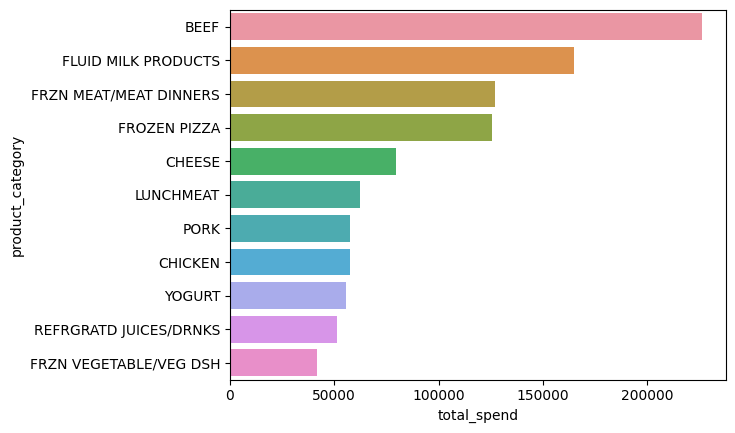

In [23]:
#bar plot of product_category versus total revenue.
sns.barplot(y = 'product_category',
            x = 'total_spend',
            data = total_revenue_category_top10)

#### Insights:
*From the above bar chart, it is clear that "BEEF" generated the Highest Revenue to the store from only the transactions occured after the campaigns."Fluid milk products," "Frozen meat," "Frozen pizza," "Cheese," "Lunchmeat," "Pork," "Chicken," "Yogurt," "Refrigerated juices," and "Frozen vegetables" which also contributed significantly to the store's revenue post-campaign.*

### (ii) How can we describe the monthly revenue trends derived from all households?

In [50]:
# adding new field "month" to fetch the month of each transaction

transactions_income['month']=pd.to_datetime(transactions_income['transaction_timestamp']).dt.month
transactions_income.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,end_date,total_spend,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,month
0,906,319,33293562159,1060312,2,10.98,1.00,0.0,0.0,22,...,2017-06-25,21.96,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1,5
1,850,292,33180190169,995242,1,1.00,0.85,0.0,0.0,21,...,2017-06-25,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,850,292,40085465010,995242,1,1.00,0.85,0.0,0.0,39,...,2017-09-24,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,850,292,40085465010,995242,1,1.00,0.85,0.0,0.0,39,...,2017-06-25,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,850,292,40335786704,995242,1,1.25,0.60,0.0,0.0,42,...,2017-09-24,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [51]:
# getting the total revenue generated in each month.
month_wise_total_revenue=transactions_income.groupby(['month']).sum('total_spend').reset_index()
# filtered the month and total_spend records.
month_wise_total_revenue_filter=month_wise_total_revenue[['month','total_spend']].sort_values(by='month')
# updated the month number with month names.
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sept',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

month_wise_total_revenue_filter['month'] = month_wise_total_revenue_filter['month'].map(month_mapping)
month_wise_total_revenue_filter

,month,total_spend
0,Jan,2772.23
1,Feb,5623.48
2,Mar,8211.98
3,Apr,8661.01
4,May,124346.70
5,Jun,144256.25
6,Jul,139243.32
7,Aug,282220.34
8,Sept,313988.89
9,Oct,327476.30


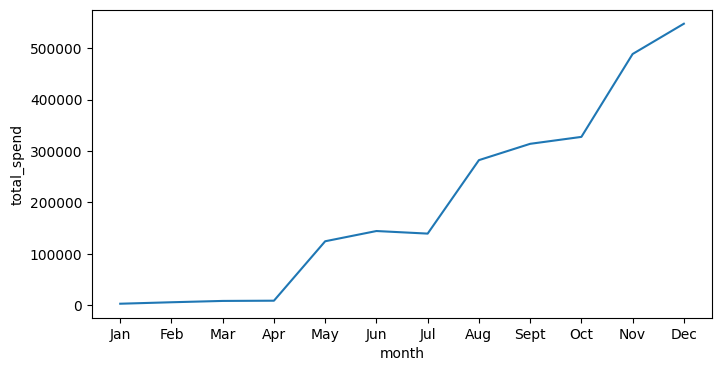

In [52]:
# plotting line chart for month versus total_spend
plt.figure(figsize=(8,4))
sns.lineplot(x ='month',y ='total_spend',data=month_wise_total_revenue_filter)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Insights:
*From the above line graph, it is clear that there is a spike in revenue in "May" and in "Aug" months. And the total revenue gradually increased over period from January to December. This shows the impact of campaigns on total revenue generation.*

### (iii) Which are the top 5 product categories favored by households in each income bracket subsequent to our marketing campaigns?

In [53]:
# to filter income, quantity and product_category
final_trans_product_filter=final_table[['income','quantity','product_category']]

# to get sum of quantity 
total_quantity=final_trans_product_filter.groupby(['income','product_category']).sum('quantity').reset_index()

#sorting the data by quantity field
total_quantity=total_quantity.sort_values('quantity',ascending=False)

# adding new field 'rank' to generate ranking of quantity in each income bracket.
total_quantity['rank']=total_quantity.groupby('income')['quantity'].rank(method='max',ascending=False)

In [54]:
#to fetch top 5 quantity of product category of each income bracket
total_quantity_top5=total_quantity[total_quantity['rank'] <=5].sort_values(['income','rank'])
total_quantity_top5


,income,product_category,quantity,rank
184,100-124K,YOGURT,1931,1.0
74,100-124K,FLUID MILK PRODUCTS,1677,2.0
14,100-124K,BEEF,642,3.0
176,100-124K,TROPICAL FRUIT,628,4.0
29,100-124K,CHEESE,623,5.0
271,125-149K,FLUID MILK PRODUCTS,2271,1.0
395,125-149K,YOGURT,2123,2.0
219,125-149K,CHEESE,1153,3.0
286,125-149K,FRZN MEAT/MEAT DINNERS,985,4.0
383,125-149K,TROPICAL FRUIT,886,5.0



#### Summary of above table:

**Income Level: Under 15K** 
FLUID MILK PRODUCTS,FROZEN PIZZA,FRZN MEAT/MEAT DINNERS,BEEF,CHEESE

**Income Level: 15-24K**
FRZN MEAT/MEAT DINNERS,FLUID MILK PRODUCTS,FROZEN PIZZA,BEEF,YOGURT

**Income Level: 25-34K**
FRZN MEAT/MEAT DINNERS,FLUID MILK PRODUCTS,YOGURT,BEEF,CHEESE

**Income Level: 35-49K**
FLUID MILK PRODUCTS,FRZN MEAT/MEAT DINNERS,FROZEN PIZZA,BEEF,YOGURT

**Income Level: 50-74K**
FLUID MILK PRODUCTS,YOGURT,FRZN MEAT/MEAT DINNERS,CHEESE,BEEF

**Income Level: 75-99K**
FLUID MILK PRODUCTS,FRZN MEAT/MEAT DINNERS,YOGURT,CHEESE,FROZEN PIZZA

**Income Level: 100-124K**
YOGURT,FLUID MILK PRODUCTS,BEEF,TROPICAL FRUIT,CHEESE

**Income Level: 125-149K**
FLUID MILK PRODUCTS,YOGURT,CHEESE,FRZN MEAT/MEAT DINNERS,TROPICAL FRUIT

**Income Level: 150-174K**
YOGURT,FLUID MILK PRODUCTS,FRZN MEAT/MEAT DINNERS,CHEESE,TROPICAL FRUIT

**Income Level: 175-199K**
YOGURT,FLUID MILK PRODUCTS,BEEF,VEGETABLES,BERRIES

**Income Level: 200-249K**
YOGURT,FLUID MILK PRODUCTS,BEEF,BERRIES,TROPICAL FRUIT

**Income Level: 250K+**
FRZN VEGETABLE/VEG DSH,FLUID MILK PRODUCTS,SALAD MIX,YOGURT,TROPICAL FRUIT
**Insights** :  *Here is a summary of the top 5 product categories after campaigns are conducted for each income level households. It offers insights into the preferences of households within different income brackets. When we observe keenly, we can identify that the top bought products are mostly YOGURT, FLUID MILK PRODUCTS, BEEF, FRZN MEAT/MEAT DINNERS, CHEESE as they appear consistently across multiple income levels as top choices, indicating their popularity among customers across various income brackets.* 

*While FRZN VEGETABLE/VEG DSH, SALAD MIX product categories are unique to the income level "250K+" and do not appear in the top 5 lists for any other income bracket. We can highlight them as distinct preferences among customers in the "250K+" income bracket. FROZEN PIZZA is more popular among lower-income levels (Under 15K, 15-24K). VEGETABLES - ALL OTHERS is preferred by the 175-199K income level. BERRIES are more favored by higher-income levels (175-199K, 200-249K).*

### (iv) Can we identify any disparities between the top 5 product categories before and after our marketing campaigns?

In [55]:
# to fetch transactions which are generated before start date of campaign start date.
transactions_before_start=transactions_campaigns_desc[pd.to_datetime(transactions_campaigns_desc['transaction_timestamp'])<=pd.to_datetime(transactions_campaigns_desc['start_date'])]

# to calculate total revenue of each transactions.
transactions_before_start['total_spend']=transactions_before_start['quantity']*transactions_before_start['sales_value']

# to merge transactions data and demographics
total_spend_before_start = pd.merge(transactions_before_start,demographics,on='household_id', how='left')

In [57]:
# verifying data for missing values
total_spend_before_start.isnull().sum()


household_id                  0
store_id                      0
basket_id                     0
product_id                    0
quantity                      0
sales_value                   0
retail_disc                   0
coupon_disc                   0
coupon_match_disc             0
week                          0
transaction_timestamp         0
campaign_id                   0
coupon_upc                    0
campaign_type                 0
start_date                    0
end_date                      0
total_spend                   0
age                      333247
income                   333247
home_ownership           489298
marital_status           439358
household_size           333247
household_comp           333247
kids_count               333247
dtype: int64

In [58]:
# removing records with null data as households with null income is not necessary.
total_spend_before_start= total_spend_before_start.dropna(axis=0)
total_spend_before_start.head(10)

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,start_date,end_date,total_spend,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,...,2017-08-08,2017-09-24,0.99,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,...,2017-08-08,2017-09-24,1.50,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
4,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,...,2017-05-08,2017-06-25,1.50,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
5,906,319,31242630288,1020156,1,1.50,0.29,0.0,0.0,2,...,2017-08-08,2017-09-24,1.50,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
6,906,319,31242630288,1020156,1,1.50,0.29,0.0,0.0,2,...,2017-05-08,2017-06-25,1.50,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
7,906,319,31355522004,1020156,2,3.00,0.58,0.0,0.0,3,...,2017-08-08,2017-09-24,6.00,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
8,906,319,31355522004,1020156,2,3.00,0.58,0.0,0.0,3,...,2017-05-08,2017-06-25,6.00,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
9,906,319,31198705046,1060312,1,5.49,0.50,0.0,0.0,1,...,2017-08-08,2017-09-24,5.49,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
10,906,319,31198705046,1060312,1,5.49,0.50,0.0,0.0,1,...,2017-05-08,2017-06-25,5.49,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
11,906,319,31343899342,1060312,1,5.49,0.50,0.0,0.0,3,...,2017-08-08,2017-09-24,5.49,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1


In [59]:
# merging transactions before start date and products_updated.
full_year_data = pd.merge(total_spend_before_start,products_updated,on='product_id', how='left')

# to filter income, quantity and product_category fields records.
trans_full_data=full_year_data[['income','quantity','product_category']]

#trans_full_data.head(10)

#to fetch total quantity of respective income and product_category
trans_full_data=trans_full_data.groupby(['income','product_category']).sum('quantity').reset_index()
#trans_full_data

# sorting records by quantity.
total_quantity_full=trans_full_data.sort_values('quantity',ascending=False)

# to add rank to quantity field in each income bracket.
total_quantity_full['rank']=total_quantity_full.groupby('income')['quantity'].rank(method='max',ascending=False)

# to fetch top 5 product_categories in each income bracket.
total_quantity_full_top1=total_quantity_full[total_quantity_full['rank'] <=5].sort_values(['income','rank'])
total_quantity_full_top1

,income,product_category,quantity,rank
180,100-124K,YOGURT,2215,1.0
69,100-124K,FLUID MILK PRODUCTS,1841,2.0
28,100-124K,CHEESE,1018,3.0
109,100-124K,LUNCHMEAT,814,4.0
13,100-124K,BEEF,708,5.0
383,125-149K,YOGURT,3074,1.0
263,125-149K,FLUID MILK PRODUCTS,2557,2.0
214,125-149K,CHEESE,2004,3.0
372,125-149K,TROPICAL FRUIT,1360,4.0
278,125-149K,FRZN MEAT/MEAT DINNERS,1054,5.0


#### Summary of above table:

**Income Level: Under 15K**
FROZEN PIZZA,FLUID MILK PRODUCTS,BEEF,FRZN MEAT/MEAT DINNERS,CHEESE

**Income Level: 15-24K**
FLUID MILK PRODUCTS,FROZEN PIZZA,FRZN MEAT/MEAT DINNERS,BEEF,CHEESE

**Income Level: 25-34K**
YOGURT,FLUID MILK PRODUCTS,FRZN MEAT/MEAT DINNERS,CHEESE,FROZEN PIZZA

**Income Level: 35-49K**
FLUID MILK PRODUCTS,CHEESE,FRZN MEAT/MEAT DINNERS,YOGURT,BEEF

**Income Level: 50-74K**
FLUID MILK PRODUCTS,FRZN MEAT/MEAT DINNERS,CHEESE,YOGURT,BEEF

**Income Level: 75-99K**
FLUID MILK PRODUCTS,YOGURT,CHEESE,FRZN MEAT/MEAT DINNERS,BEEF

**Income Level: 100-124K**
YOGURT,FLUID MILK PRODUCTS,CHEESE,LUNCHMEAT,BEEF

**Income Level: 125-149K**
YOGURT,FLUID MILK PRODUCTS,CHEESE,TROPICAL FRUIT,FRZN MEAT/MEAT DINNERS

**Income Level: 150-174K**
YOGURT,FLUID MILK PRODUCTS,FRZN MEAT/MEAT DINNERS,CHEESE,BABY FOODS

**Income Level: 175-199K**
YOGURT,CITRUS,FLUID MILK PRODUCTS,BERRIES,BEEF

**Income Level: 200-249K**
YOGURT,TROPICAL FRUIT,BEEF,CHEESE,FLUID MILK PRODUCTS

**Income Level: 250K+**
FLUID MILK PRODUCTS,YOGURT,CHEESE,FRZN MEAT/MEAT DINNERS,CHICKEN
**Insights** : *Here is a summary of the top 5 product categories before campaigns are conducted for each income level households. YOGURT and FLUID MILK PRODUCTS are consistently popular across various income levels. BEEF also appears in the top 5 for several income levels, indicating its general popularity. Different income levels show varying preferences, such as BABY FOODS in the 150-174K bracket and CITRUS in the 175-199K bracket. Lower-income levels (Under 15K and 15-24K) tend to prefer FROZEN PIZZA, while higher-income levels (250K+ and 200-249K) show diverse preferences.*

*CHEESE and FRZN MEAT/MEAT DINNERS are commonly preferred in many income groups. While yogurt is popular across several income levels, its ranking varies. It takes the top spot in the 25-34K and 75-99K income levels, indicating a preference for dairy and potentially healthier options. TROPICAL FRUIT is unique to the 125-149K income level, suggesting a taste for exotic fruits. LUNCHMEAT product category stands out in the 100-124K income level, indicating a focus on deli items. Baby foods are a unique preference in the 150-174K income level, suggesting households with infants. CITRUS and BERRIES are unique preferences in the 175-199K income level, showing an inclination towards healthier options. Chicken is a distinct preference in the 250K+ income level, possibly indicating a preference for leaner protein choices.*

*Overall, when we compare the product categories before and after campaigns we can observe that some product preferences like dairy and convenience foods are common across different income levels, there are also distinct choices that reflected mainly after campaigns which shows the campaigning and marketing impact on customer buying preferences.*

### (v) Which product categories, despite the implementation of our marketing campaigns, continue to show negligible or no income generation?

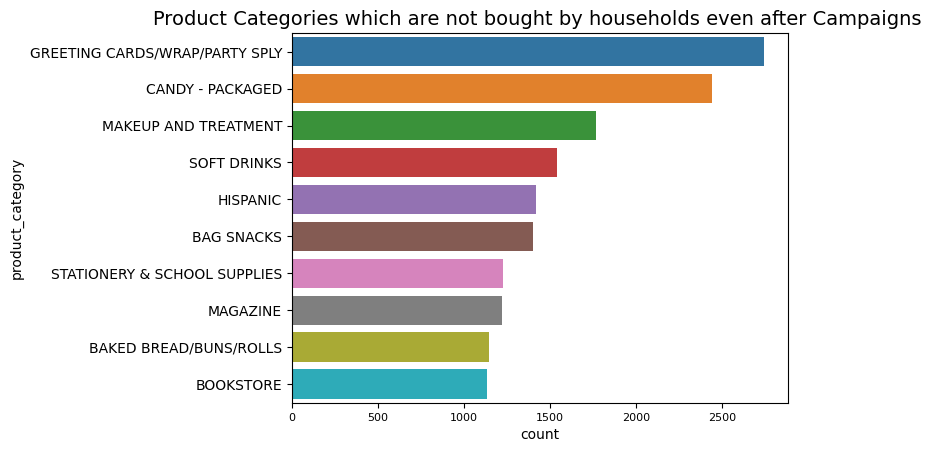

In [60]:
#To fetch the product categories that are least bought by the households. 
result = pd.merge(products_updated, transactions_after_startdate, on='product_id', how='left', indicator=True).query('_merge == "left_only"')
# Drop the '_merge' column which is no longer needed
result = result.drop(columns=['_merge'])
np.count_nonzero(result['product_id'])
result=result[['product_id','product_category','product_type']]
#plt.figure(figsize=(12, 8))
plt.title("Product Categories which are not bought by households even after Campaigns ", fontsize=14)
top_not_bought = pd.Series(result['product_category']).value_counts().head(10)
sns.countplot(data=result, y='product_category', order=top_not_bought.index)
plt.xticks(fontsize=8)
plt.show()

#### Insights:
*Above bar graph shows that, BOOKSTORE, BREAD,BUNS,MAGAZINES and STATIONERY are least bought by the households showing that they are least sensitive to campaigns. As there is no interest from the households to buy products related these product categories, we suggest the store management to invest less money in campaigning or marketing by taking minimal risk and issue more coupons or offers like '1+1 offer', 'most sold product with a least sold product as freebie' to sell the old stock of these product categories.*

### SUMMARY 
***


(i) **Problem Statement**: The analysis aimed to understand customer preferences and revenue patterns before and after marketing campaigns across different income levels.

(ii) **Methodology and Data Used**: The analysis involved the merging of campaigns, campaign_descriptions, demographics, transactions, products,coupons. Summary Tables, Bar charts and Line graphs a were employed to visualize revenue patterns and product preferences.

(iii) **Interesting Insights**:
   - "BEEF" consistently generated the highest revenue for the store post-campaigns.
   - "YOGURT","FLUID MILK PRODUCTS","BEEF","FRZN MEAT/MEAT DINNERS" and "CHEESE" were top product choices across multiple income levels post-campaigns.
   - "FRZN VEGETABLE/VEG DSH" and "SALAD MIX" were unique preferences in the "250K+" income level post-campaigns.
   - "FROZEN PIZZA" was more popular among lower-income levels (Under 15K, 15-24K).
   - "VEGETABLES - ALL OTHERS" were preferred by the 175-199K income level.
   - "BERRIES" were favored by higher-income levels (175-199K, 200-249K).
   - Preferences varied across income levels before and after campaigns, indicating the impact of marketing.

(iv) **Implications and Recommendations**: 
   - Focus on promoting "YOGURT","FLUID MILK PRODUCTS","BEEF","FRZN MEAT/MEAT DINNERS" and "CHEESE" as they are consistently popular.
   - Tailor marketing efforts to highlight unique purchasing patterns like "FRZN VEGETABLE/VEG DSH" and "SALAD MIX" for the "250K+" income bracket and promoting "FROZEN PIZZA" to lower-income levels.
   - For least prefered products use special coupons to sell out the old stock and come up with the strategies to increase the demand for these products taking minimal risk financially promoting offers like '1+1 offer', 'most sold product with a least sold product as freebie'.
   - Recognize that marketing campaigns can influence customer preferences and should be adapted accordingly.

(v) **Limitations and Future Improvements**: 
   - The analysis is based on one year of historical data. Expanding the dataset to include data from the past 5 years would provide more recent and robust insights.
   - Due to technical constraints, we limited the analysis to the top 5 product categories. Expanding this to include more categories would offer a more comprehensive view for Foodelicious CEO's decision-making process.
   - When analyzing the top 5 product categories before and after campaigns, we used the campaign start date as a reference point to prepare the data. However, this approach doesn't account for customers who regularly purchase daily necessities. A more nuanced analysis could consider this factor.
   - The line chart highlights spikes in revenue during May and August. Further investigation is needed to determine if these spikes are due to seasonal changes or external global factors affecting the business. This could be explored in greater detail.